<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/Optimization2/Model_Evaluation_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, our objective is to train some classic models such as SVM, KNN, RandomForest, etc on our test data, and try to evaluate their efficiency by plotting confusion matrixes, learning curves, validation curves, and measuring the prediction time. 

# Import phase I data

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/density_contrast_final2.csv')
data.head()

id  haloID  dc for 4.9  ...  dc for 16.2  dc for 18.1  dc for 20.0
0  12445545     460   -0.088540  ...     0.002910     0.007345     0.010225
1   9757813       0   -0.122652  ...    -0.020794    -0.018459    -0.016116
2   4364083       0   -0.104821  ...    -0.028915    -0.017630    -0.011555
3   9111430       0   -0.125753  ...     0.003451     0.003113     0.001856
4   2698019       0   -0.126528  ...    -0.019405    -0.011659    -0.007534

[5 rows x 11 columns]

In [4]:
data.describe()

id         haloID  ...    dc for 18.1    dc for 20.0
count  1.000000e+05  100000.000000  ...  100000.000000  100000.000000
mean   8.336331e+06      73.518370  ...      -0.009308      -0.004292
std    3.601997e+06     236.832955  ...       0.012521       0.011231
min    2.130504e+06       0.000000  ...      -0.050980      -0.045462
25%    5.190622e+06       0.000000  ...      -0.017410      -0.011502
50%    8.323708e+06       0.000000  ...      -0.009241      -0.004137
75%    1.143864e+07       0.000000  ...      -0.001057       0.003168
max    1.464666e+07    1233.000000  ...       0.034043       0.033879

[8 rows x 11 columns]

In [5]:
data = data.sort_values( by =['dc for 12.4'])
X, Y = data.iloc[:,2:], (data['haloID']>0).astype('int')

In [6]:
# Frequency of 1-class
print("{} % of the stored data has class 1 ".format(100*Y.sum()/len(Y)))

11.621 % of the stored data has class 1 


In [7]:
# Scale data
# You may skip this

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
# r_scaler = RobustScaler()

X = s_scaler.fit_transform(X)
# X = m_scaler.fit_transform(X)
# X = r_scaler.fit_transform(X)

In [8]:
tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


In [9]:
X_test,X_train = np.array(X_test),np.array(X_train)
Y_test,Y_train = np.array(Y_test),np.array(Y_train)
X ,Y= np.array(X),np.array(Y)

# Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
#check 
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict = classifier.predict(X_test)
#check
%t Y_predict = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict[Y_predict== 1]))

1 loop, best of 5: 3.6 s per loop
10 loops, best of 5: 115 ms per loop
20000
0


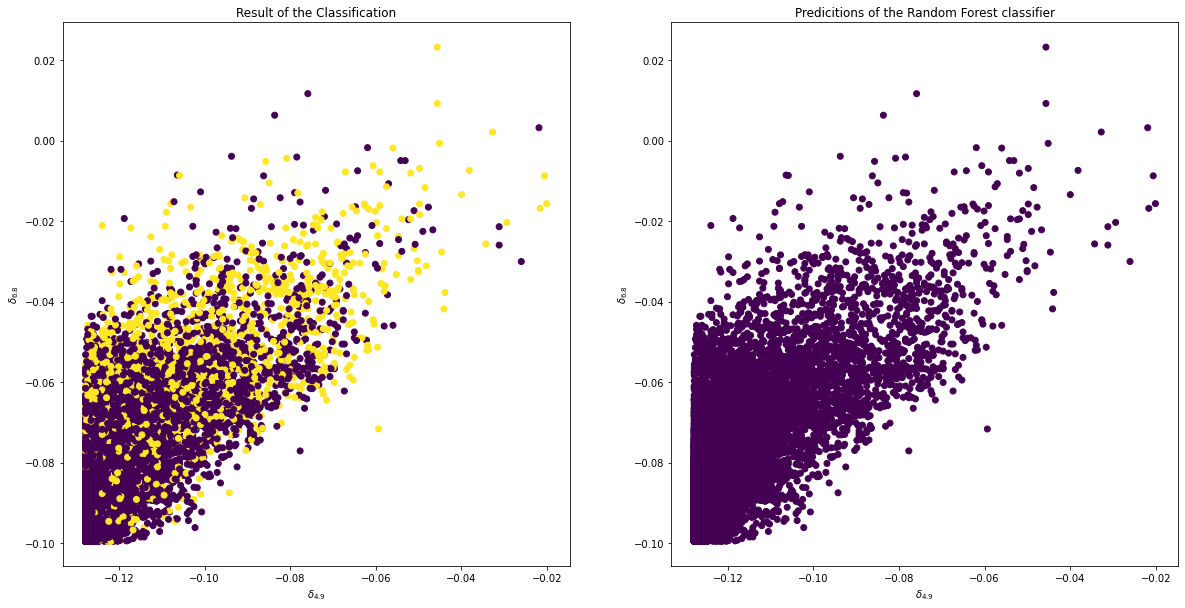

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta_{4.9}$', ylabel='$\delta_{6.8}$' , title = 'Result of the Classification')

ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta_{4.9}$ ', ylabel='$\delta_{6.8}$', title = 'Predicitions of the Random Forest classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict)
plt.show()


### The Classification Report 

In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17671
           1       0.00      0.00      0.00      2329

    accuracy                           0.88     20000
   macro avg       0.44      0.50      0.47     20000
weighted avg       0.78      0.88      0.83     20000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Fine Tunning The Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Random search of parameters, using 2 fold cross validation, 
# search across 10 different combinations, and use all available cores
print('start')
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1, refit=True)
# Fit the random search model
rf_random.fit(X_train, Y_train)

print(rf_random.best_params_)

start
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}


### Learning Curve

In [ ]:
#first we should do the classification with the optimal values.

classifier = rf_random.best_estimator_

train_sizes = np.linspace(1000,80000,5, dtype='int')

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

           0         1         2         3         4
0  1.000000  0.992000  0.992000  0.992000  0.992000
1  1.000000  0.981253  0.980578  0.980578  0.980578
2  0.986593  0.969728  0.971580  0.970716  0.970716
3  0.967618  0.968846  0.964813  0.962805  0.959485
4  0.960100  0.960938  0.961113  0.960862  0.955963

Validation scores:

         0        1        2        3        4
0  0.8838  0.88380  0.88380  0.88380  0.88375
1  0.8838  0.03775  0.89030  0.88645  0.86660
2  0.8838  0.02890  0.02065  0.88505  0.73620
3  0.8838  0.08610  0.03070  0.04450  0.76105
4  0.8838  0.10900  0.04875  0.00420  0.11680


[0.9936     0.98459759 0.97386667 0.96471369 0.959795  ]
[0.88379 0.71298 0.51092 0.36123 0.23251]


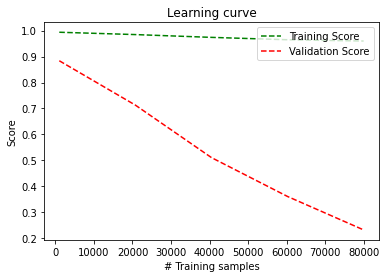

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

plt.title('Learning curve')
plt.plot(ns_list, train_scores_mean,'g--',label = 'Training Score')
plt.plot(ns_list, validation_scores_mean, 'r--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

### Training with optimized hyperparameter

In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.2 , random_state= 0)
X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 1, 
                                    max_features = 'sqrt', max_depth = 20, bootstrap = True, random_state=0)
start_train = time.time()
%t classifier.fit(X_train , Y_train)
runtime_train = time.time() - start_train

#Testing the classification on the test sample

start_pred = time.time()
%t Y_predict = classifier.predict(X_test)
runtime_pred = time.time() - start_pred

Y_predict = classifier.predict(X_test)
Y_train_pred = classifier.predict(X_train)

print(len(Y_test))
print(len(Y_predict[Y_predict == 1]))

1 loop, best of 5: 5min 56s per loop
1 loop, best of 5: 2.68 s per loop
10000
0


In [ ]:
#Evaluating the new trained model:
final_report = classification_report(Y_test, Y_predict)
print(final_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8847
           1       0.54      0.04      0.07      1153

    accuracy                           0.89     10000
   macro avg       0.72      0.52      0.51     10000
weighted avg       0.85      0.89      0.84     10000



###Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict, labels = (1,0))
print('Here is the confusion matrix for the LG classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')

Here is the confusion matrix for the LG classifier: 

TP = 8810   FP = 37 

FN = 1109   TN = 44 



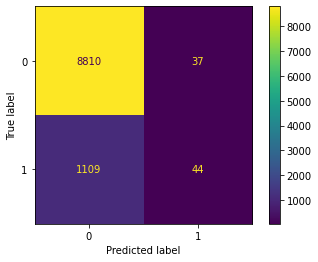

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( classifier, X_test, Y_test)  
plt.show()

###Accuracy

$Accuracy = \frac{TP + TN}{TP+TN+FP+FN} * 100$

In [ ]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 88.54%


## Precision - Recall curve

[[0.9485752  0.0514248 ]
 [0.83648051 0.16351949]
 [0.88879402 0.11120598]
 ...
 [0.94532505 0.05467495]
 [0.89773633 0.10226367]
 [0.87743232 0.12256768]]
[0 0 0 ... 0 0 0]


(0.0, 1.0)

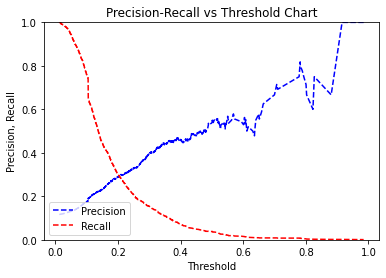

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
#getting the probability of being in each class from classifier without applying the threshold
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict)
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

As can be seen, increasing precision will result in a decrease in the recall and vice versa. The trade-off point between precision and recall is where the two curves coincide, around the threshold = 0.5, and will result in precision and recalls equal to 0.5. 

In [ ]:
from sklearn.metrics import accuracy_score
EM1 = 'accuracy'
#CVS1 =    #accuracy_score(Y_train_pred, Y_train)
CPS1 = accuracy_score(Y_test, Y_predict)
CVS1 =  CPS1  #accuracy_score(Y_train_pred, Y_train)

T1 = runtime_train
PT1 = runtime_pred
print( "Training Time was: " + str(T1))
print("Prediction Time was: " + str(PT1))

Training Time was: 2183.524209499359
Prediction Time was: 17.04436707496643


In [ ]:
# Here we tried to make an estimation of Bias and Variance
%pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        classifier, X_train, Y_train, X_test, Y_test)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)


# runtime was too long

# SVM 

Initialize and train svm model

In [ ]:
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

svc = svm.SVC()
tst_size = 0.2
ns, nf = np.shape(X) 
# split data to train and test 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
# cross validation
# scores = cross_val_score(svc, X_train, Y_train, cv=5 ,scoring= 'f1')
cv = 3
scoring = 'f1'
param_grid = {'C': [0.1, 100],  
                'gamma': [1, 0.001], 
                'kernel': ['rbf', 'sigmoid']}
# evaluate hyper-parameters 
clf = GridSearchCV(svc, param_grid, scoring = scoring, cv = cv ,verbose = 1, n_jobs=-1, return_train_score=1)
# train model
start_train = time.time()
trained_model = clf.fit(X_train, Y_train)
runtime_train = start_train - time.time()
# predict data
start_pred = time.time()
Y_pred = trained_model.predict(X_test)
runtime_pred = start_pred - time.time()
# scores = cross_val_score(clf.best_estimator_, X_train, Y_train, cv=5 ,scoring= 'accuracy')
# print(scores)
print(clf.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
import pickle

# save the model to disk
filename = 'svm_model.sav'
pickle.dump(trained_model, open(filename, 'wb'))
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

### Classification Report
Print some information about the trained model such as training time, ... 

In [ ]:
print("Best parameters set found on development set:")
print(trained_model.best_params_)
print()
# print(sorted(trained_model.cv_results_.keys()))
print(trained_model.best_score_)
# print(trained_model.cv_results_.mean_fit)

print('-----------------')
# print(Y_pred)
print('\nclassification report: \n')
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

EM2 = scoring
mean_test_scores = trained_model.cv_results_.get('mean_test_score')
CVS2 = mean_test_scores[trained_model.best_index_]
CPS2 = trained_model.score(X_test, Y_test)
T2 = runtime_train
PT2 = runtime_pred
print( "Training Time was: " + str(T2))
print("Prediction Time was: " + str(PT2))

### Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### Learning Curve


In [ ]:
ns = [100,500,1000,5000,6400]
train_sizes, train_scores, valid_scores = learning_curve(trained_model, X_train, Y_train, train_sizes=ns, cv=cv, scoring= scoring, n_jobs = -1)

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  valid_scores.mean(axis = 1)
validation_scores_std  = valid_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = scoring
plt_title = 'Learning Curve'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(train_sizes, train_scores_mean, label = 'Training Score')
ax.plot(train_sizes, validation_scores_mean, label = 'Validation Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)

plt.legend()
# plt.yscale('log')
plt.show()

print('Training scores:\n\n', pd.DataFrame( train_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', pd.DataFrame(valid_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )

### Validation Curve


In [ ]:
c_list = param_grid.get('C')
train_scores, valid_scores = validation_curve(SVC(), X_train, Y_train, 
                                              param_name="gamma",
                                              param_range=c_list , 
                                              cv=cv, 
                                              scoring = scoring,
                                              verbose=1, 
                                              n_jobs=-1
                                             )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'gamma'
ylabel = scoring
plt_title = 'Validation Curve'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.plot(c_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(c_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(c_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(c_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

# print('Training scores:\n\n', pd.DataFrame( train_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', pd.DataFrame(valid_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )

# Logistic Regression

Training a linear logistic regression with intercepts on a 1st degree polynpmial of sample data, in pipeline.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

deg = 1

lrg = LogisticRegression(fit_intercept=True, penalty='l2', max_iter=400, C = .1, tol=.005, class_weight ={0:1, 1:5}, solver='lbfgs')
clf = Pipeline([('scaler', StandardScaler() ), 
                        ('p_transformer', PolynomialFeatures(degree = deg)), 
                        ('clf', lrg)])

clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)

In [11]:
# F1 score on the test set
from sklearn.metrics import f1_score

f1_score(Y_test, Y_predict, average='macro')

0.6789298909491076

### Fine Tuning The Hyperparameter

In [ ]:
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'p_transformer', 'clf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'p_transformer__degree', 'p_transformer__include_bias', 'p_transformer__interaction_only', 'p_transformer__order', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [12]:
from sklearn.model_selection import GridSearchCV

deg_list = np.arange(1,3)

# tol = np.logspace(-3,-1, num=10)

# penalty = ['l1', 'l2']

class_weight = [{0: 1, 1:5}, {0: 1, 1:3}, None]

C = [.1,1]

solver = ['liblinear', 'sag', 'lbfgs', 'saga']

random_grid_lrg = {
                'clf__class_weight': class_weight,
                'clf__solver': solver,
                'p_transformer__degree' : deg_list,
                'clf__C': C,
                  }

print(random_grid_lrg)

{'clf__class_weight': [{0: 1, 1: 5}, {0: 1, 1: 3}, None], 'clf__solver': ['liblinear', 'sag', 'lbfgs', 'saga'], 'p_transformer__degree': array([1, 2]), 'clf__C': [0.1, 1]}


In [13]:
scoring = 'f1'
best_params= []
print('start')

lrg_grid = GridSearchCV(estimator = clf, param_grid = random_grid_lrg, scoring= scoring, cv = 4, verbose=2, pre_dispatch=2)


lrg_grid.fit(X, Y)

best_params += [lrg_grid.best_params_]
print(best_params)

start
Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__degree=1; total time=   0.2s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__degree=1; total time=   0.2s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__degree=1; total time=   0.2s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__degree=1; total time=   0.2s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__degree=2; total time=   2.1s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__degree=2; total time=   2.4s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__degree=2; total time=   2.3s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=liblinear, p_transformer__d

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.9s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   1.4s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   1.3s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   1.2s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   1.5s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=2; total time=   3.3s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=2; total time=   1.6s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=2; total time=   1.3s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transf

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.9s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   1.6s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   1.5s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   1.5s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   1.5s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=2; total time=   3.3s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=2; total time=   1.6s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=2; total time=   1.6s
[CV] END clf__C=0.1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transf

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.6s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   1.9s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   1.8s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   1.9s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   1.7s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.0s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.4s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.9s
[CV] END clf__C=0.1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.6s
[CV] END clf__C=1, clf__class_weight

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.5s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   1.4s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   0.4s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   0.4s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=1; total time=   1.1s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=2; total time=   3.3s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=2; total time=   1.5s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=2; total time=   1.2s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 5}, clf__solver=saga, p_transformer__degree=2; t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.8s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   3.0s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   2.2s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   1.5s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=1; total time=   1.9s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=2; total time=   3.3s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=2; total time=   1.5s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=2; total time=   1.6s
[CV] END clf__C=1, clf__class_weight={0: 1, 1: 3}, clf__solver=saga, p_transformer__degree=2; t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END clf__C=1, clf__class_weight=None, clf__solver=lbfgs, p_transformer__degree=2; total time=   7.8s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   5.4s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   4.8s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   4.7s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=1; total time=   2.7s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.0s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.4s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.9s
[CV] END clf__C=1, clf__class_weight=None, clf__solver=saga, p_transformer__degree=2; total time=   1.6s
[{'clf__C': 1, 'clf__class_weight': {0: 1, 1: 5}, 'clf

In [ ]:
# Other best_params we got:
# accuracy:
## {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'p_transformer__degree': 1}
## {'clf__C': 1, 'clf__solver': 'liblinear', 'p_transformer__degree': 1}
## {'clf__C': 0.1,'clf__class_weight': None,'clf__solver': 'liblinear','p_transformer__degree': 1}
#  f1:
## {'clf__C': 1, 'clf__class_weight': {0: 1, 1: 5}, 'clf__solver': 'liblinear', 'p_transformer__degree': 1}

Best Model:

In [25]:

deg = 1

lrg = LogisticRegression(fit_intercept=True, penalty='l2', max_iter=400, C=1, tol=.005, class_weight ={0: 1, 1: 5}, solver='liblinear')
clf = Pipeline([('scaler', StandardScaler() ), 
                        ('p_transformer', PolynomialFeatures(degree = deg)), 
                        ('clf', lrg)])

### Learning Curve

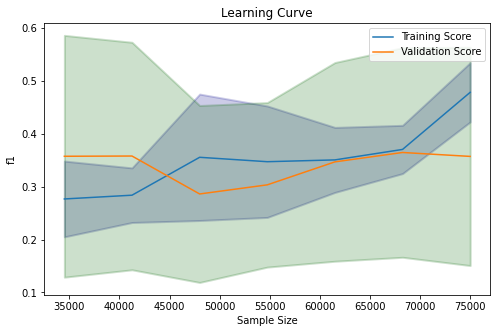

Training scores:

            cv1       cv2       cv3       cv4
0.01       NaN  0.500000  0.500000  0.500000
0.10       NaN  0.260000  0.260000  0.260000
0.19       NaN  0.248307  0.248307  0.248307
0.28       NaN  0.219883  0.219883  0.219883
0.37       NaN  0.467423  0.229651  0.229651
0.46  0.294118  0.386436  0.212958  0.212958
0.55  0.344000  0.325729  0.232574  0.232574
0.64  0.365482  0.261195  0.546439  0.248047
0.73  0.392709  0.234887  0.497275  0.263026
0.82  0.410071  0.287510  0.413379  0.290477
0.91  0.443112  0.356297  0.363245  0.317869
1.00  0.487897  0.427252  0.431276  0.565561

 ----------------------------------------------------------------------

Validation scores:

            cv1       cv2       cv3       cv4  mean_score
0.01       NaN  0.373676  0.260343  0.218369         NaN
0.10       NaN  0.388833  0.227264  0.208375         NaN
0.19       NaN  0.568507  0.434401  0.295284         NaN
0.28       NaN  0.587503  0.435761  0.281771         NaN
0.37       NaN  

In [15]:
scoring= 'f1'
cv= 4

ns = np.linspace(.01,1, num=12)
train_sizes, train_scores, valid_scores = learning_curve(clf, X, Y, train_sizes=ns,
                                                         cv=cv, scoring= scoring, n_jobs = -1)

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  valid_scores.mean(axis = 1)
validation_scores_std  = valid_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = scoring
plt_title = 'Learning Curve'

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(train_sizes, train_scores_mean, label = 'Training Score')
ax.plot(train_sizes, validation_scores_mean, label = 'Validation Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)

plt.legend()
# plt.yscale('log')
plt.show()

print('Training scores:\n\n', pd.DataFrame( train_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )
print('\n', '-' * 70) # separator to make the output easy to read
valid_df = pd.DataFrame(valid_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns)
valid_df['mean_score'] = validation_scores_mean
print('\nValidation scores:\n\n',valid_df )

Found the best split of data:

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = 100000, random_state=0) , random_state=0, test_size =.09)

### Validation Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................p_transformer__degree=1; total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................p_transformer__degree=2; total time=   2.0s
[CV] END ............................p_transformer__degree=3; total time=  29.8s
[CV] END ............................p_transformer__degree=1; total time=   0.2s
[CV] END ............................p_transformer__degree=2; total time=   3.7s
[CV] END ............................p_transformer__degree=3; total time=  26.7s
[CV] END ............................p_transformer__degree=1; total time=   0.2s
[CV] END ............................p_transformer__degree=2; total time=   3.9s
[CV] END ............................p_transformer__degree=3; total time=  24.4s
[CV] END ............................p_transformer__degree=1; total time=   0.2s
[CV] END ............................p_transformer__degree=2; total time=   2.5s
[CV] END ............................p_transformer__degree=3; total time=  35.5s
[CV] END ............................p_transformer__degree=1; total time=   0.2s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.4min finished


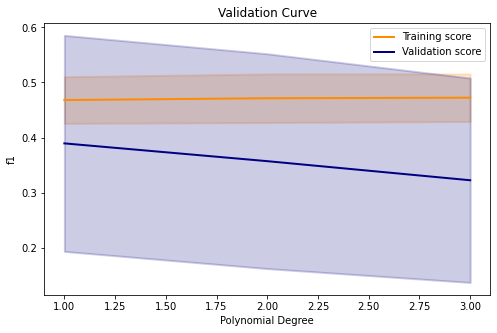

Training scores:

         cv1       cv2       cv3       cv4       cv5
1  0.481732  0.443445  0.427171  0.443471  0.544782
2  0.479925  0.443628  0.430973  0.449006  0.553530
3  0.480169  0.441029  0.435035  0.452648  0.553132

 ----------------------------------------------------------------------

Validation scores:

         cv1       cv2       cv3       cv4       cv5  mean_score
1  0.081717  0.549336  0.589744  0.486679  0.240037    0.389503
2  0.048699  0.546426  0.547295  0.422782  0.220933    0.357227
3  0.018755  0.534994  0.466750  0.374902  0.217544    0.322589


In [20]:
cv=5
scoring='f1'
deg_list = [1,2,3]
train_scores, valid_scores = validation_curve(clf, X, Y, 
                                              param_name='p_transformer__degree',
                                              param_range= deg_list, 
                                              cv=cv, 
                                              scoring = scoring,
                                              verbose=2, 
                                              pre_dispatch=3
                                             )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Polynomial Degree'
ylabel = scoring
plt_title = 'Validation Curve'

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.plot(deg_list, train_scores_mean, label="Training score",
                 color="darkorange", lw=2)
plt.fill_between(deg_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(deg_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(deg_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

print('Training scores:\n\n', pd.DataFrame(train_scores, columns=[f'cv{i+1}' for i in range(cv)], index=deg_list) )
print('\n', '-' * 70) # separator to make the output easy to read
val_df = pd.DataFrame(valid_scores, columns=[f'cv{i+1}' for i in range(cv)], index=deg_list)
val_df['mean_score'] = valid_scores_mean
print('\nValidation scores:\n\n', val_df )

### Classification Report 
Print some information about the trained model such as training time, ... 

In [31]:
from sklearn.metrics import classification_report

deg = 1

lrg = LogisticRegression(fit_intercept=True, penalty='l2', max_iter=400, C=1, tol=.005, class_weight ={0: 1, 1: 5}, solver='liblinear')
clf = Pipeline([('scaler', StandardScaler() ), 
                        ('p_transformer', PolynomialFeatures(degree = deg)), 
                        ('clf', lrg)])
start = time.time()
trained_model = clf.fit(X_train,Y_train)
runtime_train = time.time() - start

### Testing the model

start = time.time()
Y_pred = trained_model.predict(X_test)
runtime_pred = time.time() - start
out_error = np.abs(Y_test - Y_pred).sum() / len(Y_test)

in_error = np.abs(Y_train - trained_model.predict(X_train)  ).sum() / len(Y_train)

f1 = f1_score(Y_test, Y_pred, average='macro')

print(f'The in-sample error is {in_error:.4f}, and the out_sample error is {out_error:.4f}.')
print(f'The out_sample f1 score is {f1}\n\n')

clf_report = classification_report(Y_test, Y_pred)
print(clf_report)

EM3 = scoring
CVS3 = f1_score(Y_train, clf.predict(X_train))
CPS3 = f1_score(Y_test, Y_pred)
T3 = runtime_train
PT3 = runtime_pred
print( "Training Time was: " + str(T3))
print("Prediction Time was: " + str(PT3))

The in-sample error is 0.1735, and the out_sample error is 0.1721.
The out_sample f1 score is 0.677215446175149


              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7978
           1       0.36      0.64      0.46      1022

    accuracy                           0.83      9000
   macro avg       0.65      0.74      0.68      9000
weighted avg       0.88      0.83      0.85      9000

Training Time was: 0.18645167350769043
Prediction Time was: 0.0020079612731933594


### Confusion Matrix

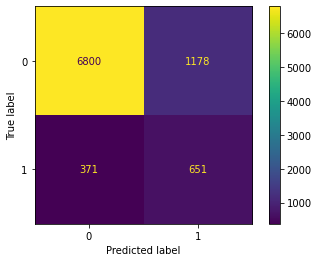

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                  algorithm='auto', leaf_size = 30, p = 2, metric='minkowski', metric_params = None)
#check
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
#check
%t Y_predict_knn = classifier.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_knn)
plt.show()


plt.show()

In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

### Validation Curve

In [ ]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1,30, 1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="n_neighbors", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('# Neighbors')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

Optimal value of $n_{neighbor}$ = 28

### Run-Time vs. leaf-size



In [ ]:
import time

leaf_range = np.arange(1,40,1)

t_time = np.array([])
p_time = np.array([])

for i in leaf_range:
    print(i)
    classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=i, p=2, metric='minkowski')
    
    start = time.time()
    classifier.fit(X_train, Y_train)
    stop = time.time()
    t1 = stop - start
    t_time = np.append(t_time , t1)
    
    start = time.time()
    n = classifier.predict(X_test)
    stop = time.time()
    t2 = stop - start
    p_time = np.append(p_time , t2)
    
plt.plot(leaf_range , t_time , 'b--' , label = 'Training time')
plt.plot(leaf_range , p_time , 'r--' , label = 'Prediction time')
plt.title('Leaf_size versus time')
plt.xlabel('Leaf size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.show()

### Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,4000,8000)

print('learning started')
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

### Fine Tuning The Model




In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 9000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=30 , p=2, metric='minkowski')
start = time.time()
%t classifier.fit(X_train , Y_train)
runtime_train = time.time() - start
#Testing the classification on the test sample
start = time.time()
Y_predict_knn = classifier.predict(X_test)
runtime_pred = time.time() - start
%t Y_predict_knn = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_knn[Y_predict_knn == 1]))

In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

### Metrics


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_knn)
print('Here is the confusion matrix for the Knn classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')

In [ ]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Accuracy

In [ ]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

### Recall

In [ ]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_knn, pos_label=0)
precision = precision_score(Y_test, Y_predict_knn, pos_label = 0)
print(f"The recall for the Knn classifier: \n {round(recall,3)}"  )
print(f"The precision for Knn classifier: \n {round(precision,3)}"  )

### Precision - Recall curve

In [ ]:
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_knn)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

In [ ]:

# print('\nclassification report: \n')
# from sklearn.metrics import classification_report
# print(classification_report(Y_test, Y_pred))

EM4 = 'accuracy'
# mean_test_scores = trained_model.cv_results_.get('mean_test_score')
CVS4 = accuracy_score(Y_train, classifier.predict(X_train))
CPS4 = accuracy_score(Y_test, Y_predict_knn)
T4 = runtime_train
PT4 = runtime_pred
print( "Training Time was: " + str(T4))
print("Prediction Time was: " + str(PT4))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

df = pd.read_csv(r'/content/drive/MyDrive/density_contrast_hunthou.csv')

from sklearn.model_selection import train_test_split 

features = ['den_contrast for 12.4', 'den_contrast for 13.0']
x = df.iloc[:,2:]
y = df['in-halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(max_depth=20)
%t clf.fit(x_train,y_train)
Y_pred_dt = clf.predict(x_test)

print(metrics.accuracy_score(y_test, Y_pred_dt))

In [ ]:
clf = DecisionTreeClassifier(max_depth=20)
clf = clf.fit(x_train,y_train)
plt.scatter(x['den_contrast for 12.4'],x['den_contrast for 13.0'],c=clf.predict(x),s=15)
plt.xlabel('$ \delta_{12.4} $')
plt.ylabel('$\delta_{13.0} $')
plt.title('Predicitions of the Decision Tree classifier')
plt.show()

### Validation Curve

In [ ]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1, 40, 1)

train_scores, test_scores = validation_curve(
    clf, X=X_train, y=Y_train,cv=5, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('Tree max_depth')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()


### Learning Curve

In [ ]:

from sklearn.model_selection import learning_curve

clf = DecisionTreeClassifier(max_depth=6)
clf.fit(x_train,y_train)

train_sizes = np.arange(1000,48000,1000)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= clf , X = x,
                                                   y = y, train_sizes = train_sizes, cv = 5, random_state = 0)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.title('Learning curve')
plt.plot(ns_list[1:], train_scores_mean[1:],'r--',label = 'Training Score')
plt.plot(ns_list[1:], validation_scores_mean[1:], 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

### Fine Tuning The Model

In [ ]:
from sklearn.model_selection import train_test_split 

x = df.iloc[:,2:]
y = df['in-halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20000, random_state=1)

clf = DecisionTreeClassifier(max_depth=6)
start = time.time()
%t clf.fit(x_train,y_train)
runtime_train = time.time() - start

start = time.time()
y_pred_dt = clf.predict(x_test)
runtime_pred = time.time() - start
%t y_pred_dt = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_dt))

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, clf.predict(x_test))
print(clf_report)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, clf.predict(x)))

In [ ]:
import itertools

conf=confusion_matrix(y, clf.predict(x))
class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y, clf.predict(x), pos_label=0))
print(precision_score(y, clf.predict(x), pos_label = 0))

### Precision-Recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_probs=clf.predict_proba(x_test) 
precision, recall, thresholds = precision_recall_curve(y_test , y_probs[:, 1]) 
thresholds=np.append(0,thresholds)

area = auc(recall, precision)
#print(area)

plt.figure(figsize=(15, 15))
ax1 = plt.subplot(221,xlabel='Threshold',ylabel='Precision, Recall' ,title='Precision-Recall vs Threshold')
ax1.plot(thresholds, precision, "b--", label="Precision")
ax1.plot(thresholds, recall, "r--", label="Recall")
plt.legend(loc="lower left",prop={'size': 15})

ax2 = plt.subplot(222,title='Precision-Recall curve',xlabel='Recall',ylabel='Precision')
ax2.plot( recall,precision,'g--',label='AUC={:.2f}'.format(area))
ax2.set( ylim=(-.05, 1.05))
plt.legend(loc="lower left",prop={'size': 15})

plt.show()

In [ ]:
EM5 = 'accuracy'
# mean_test_scores = trained_model.cv_results_.get('mean_test_score')
CVS5 = accuracy_score(y_train, classifier.predict(x_train))
CPS5 = accuracy_score(y_test, y_pred_dt)
T5 = runtime_train
PT5 = runtime_pred
print( "Training Time was: " + str(T5))
print("Prediction Time was: " + str(PT5))

# Comparing Models

A table is created to compare the five recently-traind models above. It includes evaluation metric(s), training time and prediction time of each models. Also, we sorted models based on their performance from different aspects. 

In [ ]:
table = pd.DataFrame({'Name':['Random Forest', 'SVM', 'Logestic Regression', 'KNN', 'Decision Tree'],
                        'Evaluation Metric(s)': [EM1, EM2, EM3, EM4, EM5],
                        'Corresponding Validation Score': [CVS1, CVS2, CVS3, CVS4, CVS5],
                        'Corresponding Prediction Score':  [CPS1, CPS2, CPS3, CPS4, CPS5],
                        'Training Time': [T1, T2, T3, T4, T5],
                        'Prediction Time': [PT1, PT2, PT3, PT4, PT5],
})

print('Sort models based on their validation scores: \n' + str(table.sort_values(by=['Corresponding Validation Score'], ascending= False).loc[:, ['Name', 'Corresponding Prediction Score']]))
print('\nSort models based on their prediction scores: \n' + str(table.sort_values(by=['Corresponding Prediction Score'], ascending= False).loc[:, ['Name', 'Corresponding Prediction Score']]))
print('\nSort models based on their training time: \n' + str(table.sort_values(by=['Training Time'], ascending= True).loc[:, ['Name', 'Training Time']]))
print('\nSort models based on their prediction time: \n' + str(table.sort_values(by=['Prediction Time'], ascending= True).loc[:, ['Name', 'Prediction Time']]))
